In [1]:
%pip install nltk
%pip install python-Levenshtein

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from difflib import SequenceMatcher
import Levenshtein
from fuzzywuzzy import fuzz
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
sns.set_style("darkgrid")

In [3]:
sentence = 'The homicide occurred at the 1700 block of S. Halsted Ave.' \
  ' It happened just after midnight. Another person was killed at the' \
  ' intersection of 55th and Woodlawn, where a lone gunman'

In [4]:
# Tokenization

words = nltk.word_tokenize(sentence)
print(words)

['The', 'homicide', 'occurred', 'at', 'the', '1700', 'block', 'of', 'S.', 'Halsted', 'Ave', '.', 'It', 'happened', 'just', 'after', 'midnight', '.', 'Another', 'person', 'was', 'killed', 'at', 'the', 'intersection', 'of', '55th', 'and', 'Woodlawn', ',', 'where', 'a', 'lone', 'gunman']


In [5]:
# Lemmatization

lemmatizer = nltk.stem.WordNetLemmatizer()

print([lemmatizer.lemmatize(word, nltk.corpus.wordnet.VERB) for word in words])

['The', 'homicide', 'occur', 'at', 'the', '1700', 'block', 'of', 'S.', 'Halsted', 'Ave', '.', 'It', 'happen', 'just', 'after', 'midnight', '.', 'Another', 'person', 'be', 'kill', 'at', 'the', 'intersection', 'of', '55th', 'and', 'Woodlawn', ',', 'where', 'a', 'lone', 'gunman']


In [6]:
nltk.download("stopwords")
important_words = [word for word in words if word.lower() not in nltk.corpus.stopwords.words("english")]
print(important_words)

['homicide', 'occurred', '1700', 'block', 'S.', 'Halsted', 'Ave', '.', 'happened', 'midnight', '.', 'Another', 'person', 'killed', 'intersection', '55th', 'Woodlawn', ',', 'lone', 'gunman']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joshherzberg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Bag Of Words

In [8]:
para = """Among all the things that help shape a New York City mayor’s image, it’s not always the most consequential topics that tend to stick — especially on matters that concern food. Just ask Mayor Bill de Blasio. On second thought, maybe don’t ask him: Mr. de Blasio is still remembered for making the mistake of eating a slice at Goodfella’s, a popular pizzeria on Staten Island, with a knife and fork. It was his second week in office. Food can be a strangely unifying or divisive factor in New York City politics, with people taking sides on pizza slices, deli choices and, of course, bagels. That remains true even now, with New York City in crisis, and the mayor’s race perhaps the most important in a generation. Yet with the pandemic forcing much of the campaign inside and online, discussing food — and consuming it at sporadic in-person campaign events — has been a pleasant diversion. Andrew Yang, the former presidential hopeful, keeps a photo diary of his campaign snacks on Twitter: gourmet pickles on the Lower East Side of Manhattan; pizza at Gino’s restaurant in Bay Ridge in Brooklyn; Dominican food in Hunts Point in the Bronx. When Mr. Yang stopped recently for soup dumplings and scallion pancakes in Chinatown, he said that he wanted to highlight restaurants that are struggling during the pandemic. “As much as I enjoyed running for president, the culinary options of New York City are very different than those in Iowa and New Hampshire,” he said. “It’s been delightful for me to think of a type of a food that I want, and it’s available.” Mr. Yang is not the only candidate dining al fresco. After Mr. Yang posted a photo of his lunch with Donovan Richards, the Queens borough president, at Szechuan Mountain House in January, Maya Wiley soon followed with news of having had “slammin’ chicken wings” with Mr. Richards at Queens Bully, a gastro pub. Even before she entered the race, Ms. Wiley, a former MSNBC analyst and ex-counsel to Mr. de Blasio, posted a photo last summer of her Caribbean meal at Code Red in the Bronx with Carl Heastie, the State Assembly speaker — a coveted ally who has not made an endorsement yet. Eating on the campaign trail can be trickier for Eric Adams, the Brooklyn borough president, who is a vegan evangelist and often brings his own food. He grabbed a green goddess smoothie and a quinoa tofu bowl one recent morning before visiting Yankee Stadium in the Bronx to hand out masks. “This will be in the car so I can have healthy options, and I don’t have to nibble on something unhealthy,” he said. ImageEric Adams, the Brooklyn borough president, is a vegan who published a book last year called “Healthy at Last,” about his plant-based diet. Eric Adams, the Brooklyn borough president, is a vegan who published a book last year called “Healthy at Last,” about his plant-based diet.Credit...Chang W. Lee/The New York Times For Mr. Adams, his personal transformation from an overweight police officer in the 1990s to a lean vegan who loves yoga and meditation is a key part of his campaign narrative. Mr. Adams published a book last year called “Healthy at Last” about his plant-based diet, with recipes for tempeh stir-fry and jackfruit and okra gumbo. Mr. Adams is serious about his diet after dropping 30 pounds and reversing his diabetes. He has a mental map of the best vegan spots around the city, name-dropping Screamer’s Pizzeria in Williamsburg in Brooklyn, and boasts of his homemade creations like pizza with a cauliflower crust. When Michael R. Bloomberg was mayor, he famously cracked down on trans fats, sugary drinks and salt to try to force New Yorkers to get healthy. But his personal diet was filled with indulgences: He sprinkled salt on bagels and pizza, and enjoyed burned bacon and peanut butter sandwiches, Cheez-Its and Big Macs. Mr. Adams also wants to make public health a focus of his administration if elected, but would undoubtedly be a better model in his personal habits than Mr. Bloomberg. In his book, Mr. Adams describes waking up with vision problems in March 2016 and learning he had diabetes. After years of eating fast food like McDonald’s and KFC, Mr. Adams decided to change his lifestyle, along with his partner, Tracey Collins, a former school principal. The book has plenty of practical advice: “Don’t Brag (When You Start Looking Oh So Good)” and discusses health disparities in the Black community. Now when Mr. Adams eats with community leaders, he first scans the menu for appetizers and side dishes and orders something simple like broccoli or hummus. If he is offered something homemade, he tries to be polite. “I’m a master at moving food around on the plate,” he said with a laugh. Mr. Adams isn’t even the only candidate with a cookbook: Scott M. Stringer, the city comptroller, published one on healthy eating in East Harlem in 2008. But Mr. Stringer is no expert home chef. His contribution to the book was a list of ten tips for ordering takeout, including, “That’s dressing on the side, please.” Mr. Stringer said he learned some kitchen basics after marrying his wife, Elyse Buxbaum, in 2010. “Pre-Elyse, I was a connoisseur of West Side takeout,” he said. “Now I’m proud to say that I’m getting better at cooking. I can make pasta and throw tomato sauce on it.” Asked about his best meal on the campaign trail, Mr. Stringer sounded crestfallen that he remains mostly stuck inside his bedroom closet on video chats. “Takeout sushi in the midst of Zooming,” he said. The silver lining, perhaps, is avoiding the pitfalls awaiting candidates when they make public food choices. For instance, a recent stop for a dan tat, a Chinese egg tart, got Mr. Yang into trouble with his wife, Evelyn. “It was warm and delicious,” he said. “The only problem was that I didn’t bring one home for Evelyn. She saw it on my Twitter feed.” As for Mr. de Blasio, wisdom has not necessarily come with experience. Six years after the pizza fiasco, the mayor suggested that his favorite New York City bagel came toasted — prompting many bagel aficionados to recoil in horror. To make matters worse, Mr. de Blasio’s bagel purveyor of choice did not even have a toaster."""

# clean
list_sents = nltk.sent_tokenize(para)
table = str.maketrans('', '', string.punctuation)
docs = []
for sentence in list_sents:
    clean_sentence = []
    sentence = nltk.word_tokenize(sentence)
    for word in sentence:
        word = word.replace("’", "'")
        word = word.replace("“", "\"")
        word = word.replace("”", "\"")
        word = word.replace("—", "-")
        if word not in nltk.corpus.stopwords.words("english"):
            stripped = word.lower().translate(table)
            clean_sentence.append(stripped)
    clean_sentence = " ".join([i for i in clean_sentence if i])
    docs.append(clean_sentence)
docs[:3]

['among things help shape new york city mayor image always consequential topics tend stick especially matters concern food',
 'just ask mayor bill de blasio',
 'on second thought maybe ask mr de blasio still remembered making mistake eating slice goodfella popular pizzeria staten island knife fork']

In [9]:
count_vectorizer = CountVectorizer()
bow = count_vectorizer.fit_transform(docs)
df = pd.DataFrame(bow.toarray(), columns=count_vectorizer.get_feature_names())
display(df.shape)
display(df.head())

(44, 449)

,1990s,2008,2010,2016,30,adams,administration,advice,aficionados,after,...,yang,yankee,year,years,yet,yoga,york,yorkers,you,zooming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
# BOB

count_vectorizer = CountVectorizer(ngram_range=(2, 2))
bow = count_vectorizer.fit_transform(docs)
df = pd.DataFrame(bow.toarray(), columns=count_vectorizer.get_feature_names())
display(df.shape)
display(df.head())

(44, 566)

,1990s lean,2016 learning,30 pounds,adams also,adams brooklyn,adams decided,adams describes,adams eats,adams even,adams personal,...,year called,years eating,years pizza,yet pandemic,yoga meditation,york city,york times,yorkers get,you start,zooming said
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
# TfIDF 

docfreqcounter = Counter()
for doc in docs:
    docfreqcounter.update(set(doc.split(' ')))

docsdicts = []
numdocs = len(docs)
for doc in docs:
    singledocdict = dict()
    doccounter = Counter(doc.split(' '))
    sizedoc = len(doc.split(' '))
    for word in doc.split(' '):
        tf = doccounter[word] / sizedoc
        idf = np.log(numdocs / docfreqcounter[word]) + 1
        tfidf = tf * idf
        singledocdict[word] = tfidf
    docsdicts.append(singledocdict)
pd.DataFrame(docsdicts).head()

,1990s,2008,2010,2016,30,adams,administration,advice,aficionados,after,...,yang,yankee,year,years,yet,yoga,york,yorkers,you,zooming
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.166246,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.166246,NaN,NaN,NaN


In [12]:
tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer()
values = tfidf_vectorizer.fit_transform(docs)

feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(values.toarray(), columns = feature_names).head()

,1990s,2008,2010,2016,30,adams,administration,advice,aficionados,after,...,yang,yankee,year,years,yet,yoga,york,yorkers,you,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.179070,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.180193,0.0,0.0,0.0


In [13]:
print(docs[0])
print()
print(docs[4])
print()
print(docfreqcounter["york"])
print((1/len(docs[4].split(' '))) * ((np.log(numdocs / docfreqcounter["york"])) + 1) )



among things help shape new york city mayor image always consequential topics tend stick especially matters concern food

food strangely unifying divisive factor new york city politics people taking sides pizza slices deli choices course bagels

6
0.16624612026056698


In [14]:
lsf9s = ["Lsf9 Master Participation Trust", "U S BK Trust NA | Lsf9 Master Participation", "Lsf9 Master Participatio Trust", "Lsf10 Master Participation Trust", "Lsf8 Master Participation Trust", "Lsf10 Master Participati Trust", "Lsf11 Master Participation Trust", "Lsf10 Master Particip Trust", "Lsf9 Master Participation Trus TR", "Lsf9 Master Participation Ct", "Us BK Trust NA | Lsf9 Master Participation", "Lsf9 Master Participation", "Lsf9 Master Pariticipati Trust", "Lsf9 Master Participation Trust | Caliber Home Loans", "Wesley G III Davis | Lsf9 Master Participation Trust", "Lsf8 Master Participatio Trust", "Lsf9 Master Participat Trust", "Lsf 10 Master Participation Trust", "Lsf9 Mpt", "Lsf9 Master Participa Trust", "Lsf9 Master Particiaption Trust", "Lsf9 Master Partici Trust", "Lsfio Master Participation Trust", "Lsf9 Master Participation Trust Etal", "Lsf8 Master", "Lsf9 Master Trust", "Lsf11 Master Participati Trust", "Andre & Metherine Bratton | Lsf9 Master Participatio", "Us Bank Trust NA | Lsf9 Master Participation TR", "Lsf9 Master Partic Trust", "Lasf9 Master Participation Trust", "Lsf9 Master Particination Trust", "Lsf9 Master Participation Trus Trust", "Us BK Trust | Lsf9 Master Participation", "Lsfo Master Participation Trust", "Pass-Through Nrz Trust X", "Lsf8", "Lsf9 Master Particpati Trust Ct", "Lsfll Master Participato Trust", "For Lsf9 Mas U S BK TR Trust", "Lsf8 Master Partici Trust", "Lsf9 Master Participation Rust Trust", "Gilbert Million | Lsf9 Master Participation Trust", "Mater Participation Lsf9 Trust", "Participation Lsf9 M Trust", "Lsf9 Master Partcipation Trust", "Lsf1o Master Participation Trust", "Us Bank Trust | Mater Participation Lsf9", "Lsf1 O Master Participation Trust", "Lsfs Master Participation Trust", "Lsf9 Master Participation Tru Trust", "Lsf10 Master Participaton Trust", "Lsf9 Mas", "Lsfp Land Hall Trust", "Lsf8 Master Participa Trust", "Lsfio Master Participati Trust", "Lsf10 Master Pariticipation Trust", "Lsf10 Master Particiation Trust", "Lsf9 Master Participationtrust Trust", "Dennis Johnson | Lsf9 Master Participation Trust", "Mary A & Rodney C White | Lsf9 Master Participation", "Manuel L & Arlene Saenz | Lsf9 Master Participation", "Lsf10 Master Particiaption Trust", "Lsf10 Master Particioation Trust", "Anthony L Martinez | Lsf9 Master Participation Trust", "Mastere Participation Lsf9 Trust", "Lsf10 Master Paticipation Trust", "Karen J Lenhart | Lsf9 Master Participation Trust", "Nona M Rivera | Lsf9 Master Participation Trust", "Lsf8 Master Participation Trus Trust", "Participation Lsf9 Trust", "Lsf6 Bermuda", "Lsf10 Master Articipation Trust", "Lsf9 Master Master Participati Trust", "Lsf9 Master Prticipation Trust", "Henry B & Jean M Mitchell | Lsf9 Master Participatio", "Lsf9/Master Participation Trust", "Robert K Graham | Lsf9 Master Participation Trust", "Lsf 9 Master Participation Trust", "Lsf Properties LLC", "Lsf9 Master Participationn Trust", "Maser Participation Lsf9 Trust", "Lsf9 Master Particiapation Trust", "Lsf10 Mastere Participation Trust", "Lsf8 Master Participation Trust Etal", "Lsf9 Master", "Lsf8 Master Trust", "Lsf9 Master Particiation Trust", "Lsf10 Master Partcipation Trust", "Thomas G Hocking | Lsf9 Master Participation Trust", "Lsf9 Master Participating Trust", "William L & Sharon F Tongue | Lsf9 Master Participat", "Lsf9 Master Participantion Trust", "Lsf9 Master Participati Trust", "Us BK NA | Lsf9 Master Participation", "Lsf9 Master Participaition Trust", "Ricky L Hill | Lsf9 Master Participation Trust", "Bcat 2015-13btt Trust", "M Aster Participation Lsf9 Trust", "Lsf9 Master Participation Trut Trust", "Lsf9 Master Participaton Trust", "Lsf9 Master Particip Trust", "Lsf10 Master Participation", "Lsf9 Master Patricipat Trust", "Lsf9 Master Participation Trust L", "Lsf8 Master Participation", "Ray E Cook | Lsf9 Master Participation Trust", "John K Hancock | Lsf9 Master Participation Trust", "Lsfp Master Participation Trust", "Lsfi1 Master Participati Trust", "Lsf9 Master Participattion Trust", "Us Abnk Trust NA | Lsf9 Master Participation Trust", "300 Pablo Terrace LLC", "330 Pablo Terrace LLC", "Lsf10 Master Participa Trust", "Lsf9 Master Rust Trust", "Lsf8 Master Participati Trust", "Lsf9 Master Participation Trust | Us Bank Trust", "Robert S Gonzales | Lsf9 Master Participation Trust", "Arthur H Mannon | Lsf9 Master Participation Trust", "George K Cort | Lsf9 Master Participation Trust", "John E & Cleo P Falsetta | Lsf9 Master Participation", "Sharon S Fuller | Lsf9 Master Participation Trust", "Peny J Jr & Deborah A Addington | Lsf9 Master Partic", "Masterparticipation Lsf9 Trust", "Lsf9 Master Parties Salon Trust", "Us Bank Trust NA | Lsf9 Master Participation Trust", "Lsf9 Master Participation Trust | Connie Lampieri", "Lsf9 Master Wood Avenue Partic Trust", "Lsf8 Master Partic Trust", "Lsfp Master Trust", "Lsf9 Master Parlicipation Trust", "For Lsf9 Master Partic TR Trust", "Lsf Ag Group LLC", "Master-Participation Lsf9 Trust", "Lsf9 Master Participat Trust Ct", "Lsfl 1 Master Participation Trust", "Lsf 10 Master Participat Trust", "Lsf8 Master Participationtrust Trust", "Lsfi Master Participation Trust", "Lsf8 Master Participat Ct", "Mastr Participation Lsf9 Trust", "Us Bank Trust NA | Lsf9 Master Part", "Lsf9 Master Participating Tru Trust", "Lsf11 Master Paticipatio Trust", "Lsf9 Master Ptshp Trust", "Lsf8 Master Participation Trus", "As Te for Lsf9 U S BK Trust", "Maste Participation Lsf9 Trust", "Ptcp Lsf9master Trust", "Participation Lsf9master Trust", "Lsf9 Trust", "Lsf8 Master Partcipation Trust", "Lsf10 Mortgage Holdings LLC", "Lsf9 Master Participation Trij", "Lsf8 Mstr", "Annemiee Adgar | Lsf9 Master Participation Trust", "Lsf Master Participation Trust", "Lsf0 Master Participation Trust", "Lsf9 Master Ptcp Trust", "Lsf8 Mas", "Lsf9 Master Participation Trus", "Mater Part Lsf9 Trust", "Lsf9 Master Partic", "Lsfi1 Master Participation Trust", "Mastter Participation Lsf9 Trust", "Lsf1io Master Participation Trust", "Lsfb Master Participation Trust", "Lsf9 Master Participation Trust | Us of America", "Lsf 11 Master Participation Trust", "Lsf10 Trust", "Marter Participation Trus Lsf9 Trust", "Lsfs Master Participatio Trust", "Clsf9 Master Participati Trust", "Amster Lsf9 Trust", "Lsf8 Master Trusst Trust", "Lsf8 Master Participat Trust Ct", "Lsf8 Master Ptcp Trust", "Lsf9 Master Participa", "Lsf9 Master Parti Trust", "Masfer Participation Lsf9 Trust", "Lsfll Master Participation Trust", "Mascer Participation Lsf9 Trust", "Lsf10 Master Participatio Ct Trust", "Lsf9 Master Particiapate Trust", "Lsf9 Master Partication Trust", "Lsf9 Master Participation 425 Trust", "Lsf9 Master Participaticn Trust", "Lsf8 Master Participation Tru", "Usbank NA | Lsf9 Master Participation Trust", "Lsf1lo Master Participat Trust", "Lsfq Master Participation Trus Trust", "Lsf10 Master Participat Trust", "Lsf9 Master Particitatio Trust", "Lsf8 Master Part", "Lsf9 Master Particpation Trust", "Lsf10 Master Trust", "Lsf9 Master Paicipation Trust", "Lsf10 Master Participation Tru Trust"]

def fake_fuzzy(a, b):
    # (a+b - LevenshteinScore)/(a+b)
    return (len(a) + len(b) - SequenceMatcher(None, a, b).ratio() / (len(a) + len(b)))

df = pd.DataFrame(
{
    "string": lsf9s,
    "levenshtein": [Levenshtein.distance(lsf9s[0], name) for name in lsf9s],
    "levenshtein_for_plot": [(270 - Levenshtein.distance(lsf9s[0], name)) / 270 for name in lsf9s],
    "jaro": [np.round(Levenshtein.jaro(lsf9s[0], name), 3) for name in lsf9s],
    "winkler": [np.round(Levenshtein.jaro_winkler(lsf9s[0], name), 3) for name in lsf9s],
    "fuzz": [fuzz.ratio(lsf9s[0], name) / 100 for name in lsf9s],
    "fakefuzz": [fake_fuzzy(lsf9s[0], name) for name in lsf9s]
    
}
)

display(df[["string", "levenshtein", "jaro", "winkler", "fuzz", "fakefuzz"]].head())

,string,levenshtein,jaro,winkler,fuzz,fakefuzz
0,Lsf9 Master Participation Trust,0,1.000,1.000,1.00,61.983871
1,U S BK Trust NA | Lsf9 Master Participation,24,0.491,0.491,0.68,73.990869
2,Lsf9 Master Participatio Trust,1,0.989,1.000,0.98,60.983875
3,Lsf10 Master Participation Trust,2,0.968,0.978,0.95,62.984883
4,Lsf8 Master Participation Trust,1,0.978,0.985,0.97,61.984391


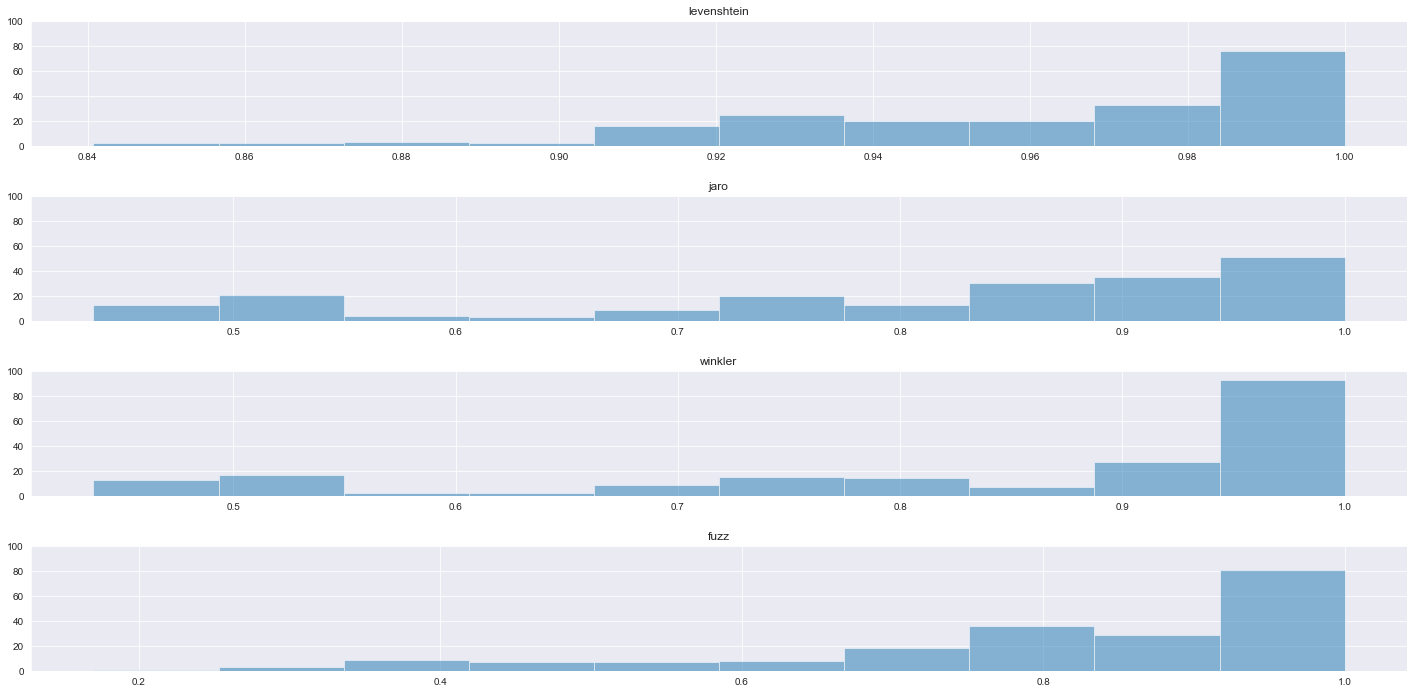

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=[20, 10])
sns.set_style("darkgrid")
ax[0].hist(df["levenshtein_for_plot"], alpha=.5,)
ax[1].hist(df["jaro"], alpha=.5, )
ax[2].hist(df["winkler"], alpha=.5,)
ax[3].hist(df["fuzz"], alpha=.5,)
ax[0].set_title("levenshtein")
ax[1].set_title("jaro")
ax[2].set_title("winkler")
ax[3].set_title("fuzz")
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)
ax[2].set_ylim(0, 100)
ax[3].set_ylim(0, 100)

fig.tight_layout(pad=2.0)

In [16]:
for dist in ["levenshtein_for_plot", "jaro", "winkler", "fuzz"]: 
    print(f"{dist}: {sum(np.abs(0 - df[dist]) ** 2)}")

levenshtein_for_plot: 184.18724279835385
jaro: 134.23695300000006
winkler: 149.02081699999994
fuzz: 136.17490000000015


In [17]:
# PartofSpeech
text = nltk.word_tokenize(docs[0])
nltk.pos_tag(text)

[('among', 'IN'),
 ('things', 'NNS'),
 ('help', 'VBP'),
 ('shape', 'VB'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('city', 'NN'),
 ('mayor', 'NN'),
 ('image', 'NN'),
 ('always', 'RB'),
 ('consequential', 'JJ'),
 ('topics', 'NNS'),
 ('tend', 'VBP'),
 ('stick', 'JJ'),
 ('especially', 'RB'),
 ('matters', 'NNS'),
 ('concern', 'NN'),
 ('food', 'NN')]

In [18]:
pwd

'/Users/joshherzberg/Documents/audantic/pipelines'